In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
DATA_PATH = "data/nyse_data"

for dirname, _, filenames in os.walk(DATA_PATH):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/nyse_data/prices-split-adjusted.csv
data/nyse_data/fundamentals.csv
data/nyse_data/prices.csv
data/nyse_data/securities.csv


In [3]:
FUNDAMENTALS_PATH = "data/nyse_data/fundamentals.csv"
PRICES_PATH = "data/nyse_data/prices.csv"

In [4]:
# first glance at the data
list(pd.read_csv(FUNDAMENTALS_PATH).columns)

['Unnamed: 0',
 'Ticker Symbol',
 'Period Ending',
 'Accounts Payable',
 'Accounts Receivable',
 "Add'l income/expense items",
 'After Tax ROE',
 'Capital Expenditures',
 'Capital Surplus',
 'Cash Ratio',
 'Cash and Cash Equivalents',
 'Changes in Inventories',
 'Common Stocks',
 'Cost of Revenue',
 'Current Ratio',
 'Deferred Asset Charges',
 'Deferred Liability Charges',
 'Depreciation',
 'Earnings Before Interest and Tax',
 'Earnings Before Tax',
 'Effect of Exchange Rate',
 'Equity Earnings/Loss Unconsolidated Subsidiary',
 'Fixed Assets',
 'Goodwill',
 'Gross Margin',
 'Gross Profit',
 'Income Tax',
 'Intangible Assets',
 'Interest Expense',
 'Inventory',
 'Investments',
 'Liabilities',
 'Long-Term Debt',
 'Long-Term Investments',
 'Minority Interest',
 'Misc. Stocks',
 'Net Borrowings',
 'Net Cash Flow',
 'Net Cash Flow-Operating',
 'Net Cash Flows-Financing',
 'Net Cash Flows-Investing',
 'Net Income',
 'Net Income Adjustments',
 'Net Income Applicable to Common Shareholders',
 

In [5]:
subset = pd.read_csv(FUNDAMENTALS_PATH).loc[:, ["Period Ending", "Ticker Symbol", "Total Revenue", "Earnings Per Share"]]
subset.head()

,Period Ending,Ticker Symbol,Total Revenue,Earnings Per Share
0,2012-12-31,AAL,2.485500e+10,-5.60
1,2013-12-31,AAL,2.674300e+10,-11.25
2,2014-12-31,AAL,4.265000e+10,4.02
3,2015-12-31,AAL,4.099000e+10,11.39
4,2012-12-29,AAP,6.205003e+09,5.29


In [6]:
subset.shape

(1781, 4)

# 1. Basic Plots

## Gráfico de línea (_Line plot_)

Un gráfico de línea se utiliza para visualizar la relación entre dos variables continuas. Algunos ejemplos típicos relacionados con el mundo financiero y económico son:

- Evolución del ratio de crecimiento del Producto Interior Bruto (PIB) a lo largo del tiempo
- Evolución del precio por acción del un valor a los largo del tiempo
- Evolución del ratio de crecimiento de la facturación a lo largo del tiempo

Como podemos ver, los gráficos de línea son muy utilizados a la hora de visualizar la evolución de una variable con respecto al tiempo.

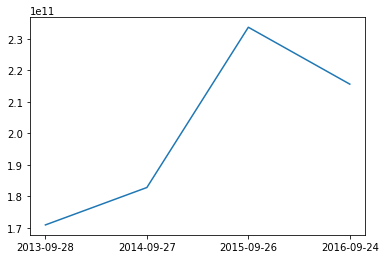

In [7]:
# line plot AAPL: Total Revenue Growth over time -> X: "Period Ending", y: "Total Revenue"
aapl = subset.loc[subset["Ticker Symbol"] == "AAPL", ["Period Ending", "Total Revenue"]] \
    .sort_values("Period Ending").set_index("Period Ending")
plt.plot(aapl)
plt.show();

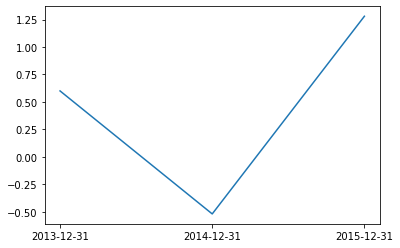

In [8]:
# line plot AMZN: EPS over time -> X: "Period Ending", y: "Earnings Per Share"
aapl = subset.loc[subset["Ticker Symbol"] == "AMZN", ["Period Ending", "Earnings Per Share"]] \
    .sort_values("Period Ending").set_index("Period Ending")
plt.plot(aapl)
plt.show();

Los gráficos de línea son muy utlizados a la hora de visualizar el evolución del precio de un valor a lo largo del tiempo. También nos ayudan a visualizar correlaciones entre los precios de dos o varios valores de forma rápida y sencilla. Vamos a ver un ejemplo con AAPL y MSFT.

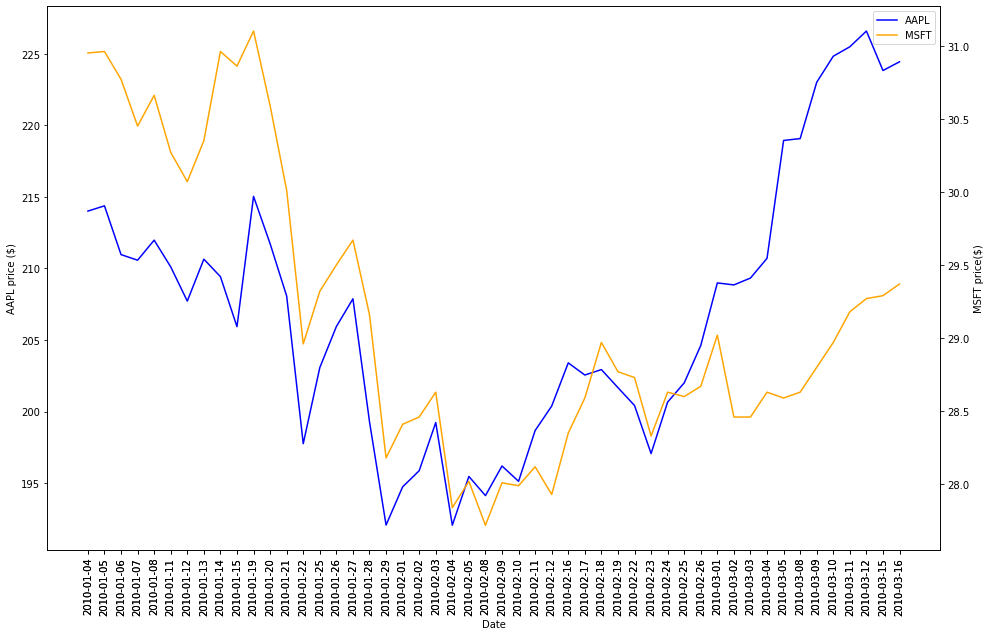

In [74]:
# appl and msft prices
tech_prices = pd.read_csv(PRICES_PATH).loc[pd.read_csv(PRICES_PATH)["symbol"].isin(["MSFT", "AAPL"]), ["date", "symbol", "close"]] \
    .sort_values("date")[:100]
tech_prices.head(10)

# prepare data for plotting
aapl_price = tech_prices.loc[tech_prices["symbol"] == "AAPL", ["date", "close"]].set_index("date")
msft_price = tech_prices.loc[tech_prices["symbol"] == "MSFT", ["date", "close"]].set_index("date")
dates = tech_prices["date"].values
dates_labels = [pd.to_datetime(str(date)).strftime("%Y-%m-%d") for date in dates]

# check with line plots
fig, ax = plt.subplots(figsize=(16, 10))

twin1 = ax.twinx()

p1, = ax.plot(aapl_price, "b-", label="AAPL")
p2, = twin1.plot(msft_price, "orange", label="MSFT")

ax.set_xlabel("Date")
ax.set_ylabel("AAPL price ($)")
twin1.set_ylabel("MSFT price($)")

ax.set_xticks(dates)
ax.set_xticklabels(dates_labels, rotation=90)

ax.legend(handles=[p1, p2])

plt.show();

## Gráfico apilado (_Stacked plot_)
Un gráfico apilado se utiliza para visualizar areas debajo de un gráfico de línea. Está formado por varios gráficos de línea apilados uno encima de otro. Se suele utilizar para visualizar el efecto acumulativo de varias variables mostradas en el eje vertical y.


## Gráfico de barras (_Bar plot_)
Los gráficos de barras se utilizan para visualizar variables categóricas y hacer comparaciones entre ellas. Podemos orientar las barras de forma vertical u horizontal, dependiendo del eje que asignemos a la variable categórica que lo asignaremos en función del número de valores únicos que pueda tomar la variable categórica.

In [9]:
# subset
aapl_prices = pd.read_csv(PRICES_PATH).loc[pd.read_csv(PRICES_PATH)["symbol"] == "AAPL", ["date", "volume", "close"]] \
    .sort_values("date")[:19]
aapl_prices.head()

,date,volume,close
254,2010-01-04,123432400.0,214.009998
721,2010-01-05,150476200.0,214.379993
1189,2010-01-06,138040000.0,210.969995
1657,2010-01-07,119282800.0,210.580000
2125,2010-01-08,111902700.0,211.980005


In [10]:
# check data types
aapl_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 254 to 8677
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    19 non-null     object 
 1   volume  19 non-null     float64
 2   close   19 non-null     float64
dtypes: float64(2), object(1)
memory usage: 608.0+ bytes


Necesitamos convertir la columna `date` a formato datetime.

In [11]:
# convert 'date' column from string to datetime
aapl_prices["date"] = pd.to_datetime(aapl_prices["date"], format="%Y-%m-%d")
aapl_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 254 to 8677
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    19 non-null     datetime64[ns]
 1   volume  19 non-null     float64       
 2   close   19 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 608.0 bytes


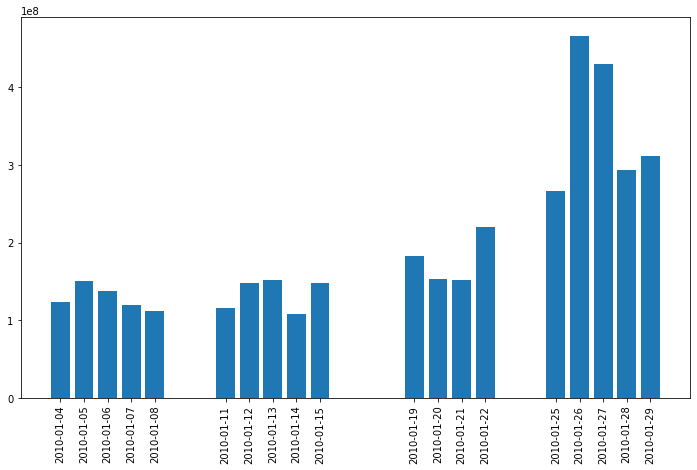

In [12]:
# prepare data for plotting
dates = aapl_prices["date"].values
dates_labels = [pd.to_datetime(str(date)).strftime("%Y-%m-%d") for date in dates]
volume = aapl_prices["volume"].values
# vertical bar plot
fig, ax = plt.subplots(figsize=(12, 7))
plt.xticks(dates, dates_labels, rotation=90)
ax.bar(dates, volume)
plt.show();

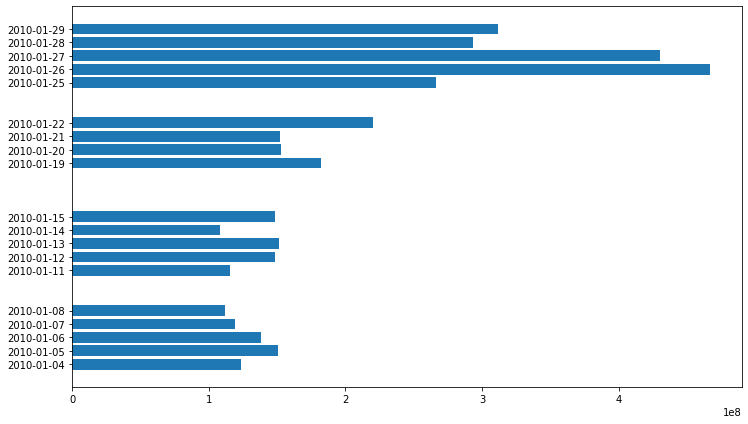

In [13]:
# horizontal bar plot
fig, ax = plt.subplots(figsize=(12, 7)) # define figure size
plt.yticks(dates, dates_labels, rotation=0)
ax.barh(dates, volume, height=0.8, align="center")
plt.show();

## Histograma  (_Histogram_)
Un histograma es una gráfico de barras que se utiliza para visualizar la distribución de una variable continua. Los valores de las variables continuas se asignan varios intervalos (o _bins_) y estos se visualizan en el eje x mientras que el eje y representa el número de valores asignados a un intervalo.

## Gráfico de dispersión  (_Scatter plot_)

Los gráficos de dispersión se utilizan para comparar dos variables y buscar correlaciones entre ellas.

BUSCAR UN EJEMPLO

## Gráfico de burbujas  (_Bubble plot_)
Es un gráfico muy similar a un gráfico de dispersión donde cada punto se representa con una burbuja. Cada burbuja puede ser mostrada con diferente color, tamaño o apariencia en función de una tercera variable. Estos gráfico nos permiten incorporar más variables al gráfico.

## Gráfico circular (_Pie plot_)
Un gráfico circular se utilizar para representar la contribución de varios grupos a un total.

## Diagrama de caja y bigote (_Box plot_)
Los diagramas de caja y bigote son utilizados para visulizar estadísticos descriptivos de variables continuas. En ellos podemos ver la siguiente información:
- Primer y tercer cuartil
- Mediana
- Bigotes mostrando el valor 1.5 veces el rango intercuartil

Son muy útiles para identificar _outliers_.

## Gráfico de violin (_Violin plot_)

## Mapa de calor (_Heatmap_)